# Proyecto: Análisis de jugadores de fútbol

---



## 1. Presentación de la empresa, organización o problema específico.

El problema que trata de resolverse en este proyecto, es como encontrar un jugador de fútbol en el mercado, que cumpla con las características necesarias para su posición teniendo en cuenta las de su sucesor. Este reemplazante tiene que poder aportar al equipo los mismos atributos que el jugador saliente, sin pasarse del presupuesto del club.

## 2. Preguntas y objetivos de la investigación.

El objetivo del proyecto es verificar si a partir de ciertos atributos podremos predicir el valor de un jugador en el mercado

## 3. Conformación del equipo de trabajo.



*   Farid Alvarez
*   Federico Carboni
*   Jeronimo Giri
*   Juan Giustina
*   Juan Manuel Tornero








## 4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

Nombre del dataset: FIFA22 OFFICIAL DATASET

Fuente: Kaggle

Actualización: Enero 2022

URL: https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA22_official_data.csv

Este dataset cuenta con variables interesantes como valor de mercado y salario de los jugadores. Variables importantes para tener en cuenta en la búsqueda de un nuevo jugador para tu equipo.

## 5. Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

In [ ]:
# Importamos librerías

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
# Lectura del dataset

df = pd.read_csv('/content/FIFA22_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [ ]:
df.shape

(16710, 65)

In [ ]:
df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [ ]:
df[df['Best Position']== 'GK']

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
10736,21570,14 Rogério Ceni,40,https://cdn.sofifa.com/players/021/570/14_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,75,75,São Paulo,https://cdn.sofifa.com/teams/598/30.png,...,25.0,78.0,67.0,90.0,84.0,70.0,GK,75.0,NaN,NaN
11192,210257,Ederson,27,https://cdn.sofifa.com/players/210/257/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,89,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,8.0,87.0,82.0,93.0,88.0,88.0,GK,89.0,€181M,29.0
12350,167495,M. Neuer,35,https://cdn.sofifa.com/players/167/495/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,90,90,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,11.0,88.0,88.0,91.0,89.0,88.0,GK,90.0,€22.3M,17.0
12410,163301,J. Orozco,35,https://cdn.sofifa.com/players/163/301/22_60.png,Mexico,https://cdn.sofifa.com/flags/mx.png,75,75,Club Tijuana,https://cdn.sofifa.com/teams/111678/30.png,...,25.0,75.0,71.0,81.0,75.0,74.0,GK,75.0,€1.1M,29.0
13109,204935,J. Pickford,27,https://cdn.sofifa.com/players/204/935/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,83,85,Everton,https://cdn.sofifa.com/teams/7/30.png,...,12.0,83.0,78.0,87.0,80.0,86.0,GK,83.0,€65.2M,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


In [ ]:
# Eliminamos algunas columnas que contienen URLs

df2 = df[['ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness']]

df2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,€100K,€1K,782,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,€500,754,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [ ]:
df2.Value

0        €107.5M
1           €93M
2         €44.5M
3        €125.5M
4           €37M
          ...   
16705      €100K
16706      €180K
16707      €100K
16708      €110K
16709         €0
Name: Value, Length: 16710, dtype: object

Se debe realizar una transformacion a la variable 'Value', ya que va a ser el target del modelo. Hay que transformarla a valor numerico

In [ ]:
# Se elimina el signo €
for index in range(0, len(df2['Value'])):
    string = str(df2['Value'].iat[index])
    replace_eu = string.replace('€','')
    df2['Value'].iat[index] = replace_eu
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5M,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93M,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5M,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5M,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37M,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [ ]:
df2.shape

(16710, 62)

Se va a separar el dataset segun tengan una M o una K en la columna de Value, que representa millones o miles

In [ ]:
df_M= df2[df2.Value.str.contains('M')]
df_M.shape

(9901, 62)

In [ ]:
df_K= df2[df2.Value.str.contains('K')]
df_K.shape

(6465, 62)

In [ ]:
df_0 = df2[df2.Value == '0']
df_0.shape

(344, 62)

Observamos que hay datos que tiene valor 0. Esos datos no los tendremos en cuenta, porque consideramos que no aporta al modelo

In [ ]:
df_M.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5M,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93M,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5M,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5M,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37M,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [ ]:
for index in range(0, len(df_M['Value'])):
    string = str(df_M['Value'].iat[index])
    replace_M = string.replace('M','')
    df_M['Value'].iat[index] = replace_M
    
df_M['Value'] = pd.to_numeric(df_M['Value'])
df_M['Value'].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    107.5
1     93.0
2     44.5
3    125.5
4     37.0
Name: Value, dtype: float64

In [ ]:
df_M.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [ ]:
df_M.Value

0        107.5
1         93.0
2         44.5
3        125.5
4         37.0
         ...  
16551      1.0
16555      1.1
16559      2.3
16577      1.0
16607      1.0
Name: Value, Length: 9901, dtype: float64

In [ ]:
df_K.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
408,5099,12 G. Zambrotta,34,Italy,76,76,AC Milan,825K,€30K,2067,...,78.0,10.0,10.0,15.0,5.0,10.0,CM,76.0,NaN,NaN
422,246,13 P. Scholes,37,England,80,80,Manchester United,400K,€40K,2065,...,36.0,7.0,12.0,5.0,15.0,8.0,CAM,82.0,NaN,NaN
529,177553,Vieirinha,35,Portugal,73,73,PAOK,925K,€750,2048,...,71.0,15.0,10.0,12.0,11.0,13.0,RB,73.0,€2M,71.0
693,164459,S. Larsson,36,Sweden,72,72,AIK,750K,€5K,2025,...,60.0,7.0,11.0,14.0,14.0,8.0,CM,72.0,€938K,71.0
714,5471,17 F. Lampard,38,England,78,78,New York City FC,575K,€8K,2022,...,57.0,12.0,14.0,15.0,10.0,8.0,CM,76.0,NaN,NaN


In [ ]:
for index in range(0, len(df_K['Value'])):
    string = str(df_K['Value'].iat[index])
    replace_K = string.replace('K','')
    df_K['Value'].iat[index] = replace_K
    
df_K['Value'] = pd.to_numeric(df_K['Value'])
df_K['Value'].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


408    825
422    400
529    925
693    750
714    575
Name: Value, dtype: int64

In [ ]:
# Los valores miles los expresaremos en terminos de millones, asi se unifica el valor
df_K['Value'] = df_K['Value']/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_K.shape

(6465, 62)

In [ ]:
df_K.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
408,5099,12 G. Zambrotta,34,Italy,76,76,AC Milan,0.825,€30K,2067,...,78.0,10.0,10.0,15.0,5.0,10.0,CM,76.0,NaN,NaN
422,246,13 P. Scholes,37,England,80,80,Manchester United,0.400,€40K,2065,...,36.0,7.0,12.0,5.0,15.0,8.0,CAM,82.0,NaN,NaN
529,177553,Vieirinha,35,Portugal,73,73,PAOK,0.925,€750,2048,...,71.0,15.0,10.0,12.0,11.0,13.0,RB,73.0,€2M,71.0
693,164459,S. Larsson,36,Sweden,72,72,AIK,0.750,€5K,2025,...,60.0,7.0,11.0,14.0,14.0,8.0,CM,72.0,€938K,71.0
714,5471,17 F. Lampard,38,England,78,78,New York City FC,0.575,€8K,2022,...,57.0,12.0,14.0,15.0,10.0,8.0,CM,76.0,NaN,NaN


In [ ]:
# juntamos los dos datasets
df_nuevo = pd.concat([df_M, df_K])
df_nuevo.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,€250K,2341,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,€140K,2314,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,€135K,2307,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,€350K,2304,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,€45K,2292,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [ ]:
df_nuevo.shape

(16366, 62)

In [ ]:
df_nuevo['Best Position'].unique()

array(['CAM', 'CM', 'ST', 'LB', 'CDM', 'CB', 'RB', 'LM', 'RW', 'LW', 'CF',
       'LWB', 'RM', 'RWB', 'GK'], dtype=object)

Observamos que existen varias posiciones, dependiendo la zona de la cancha. 
Se encasillara a los jugadores en posiciones generales, a partir de su posicion especifica, segun corresponda, teniendo la siguiente imagen como referencia. 

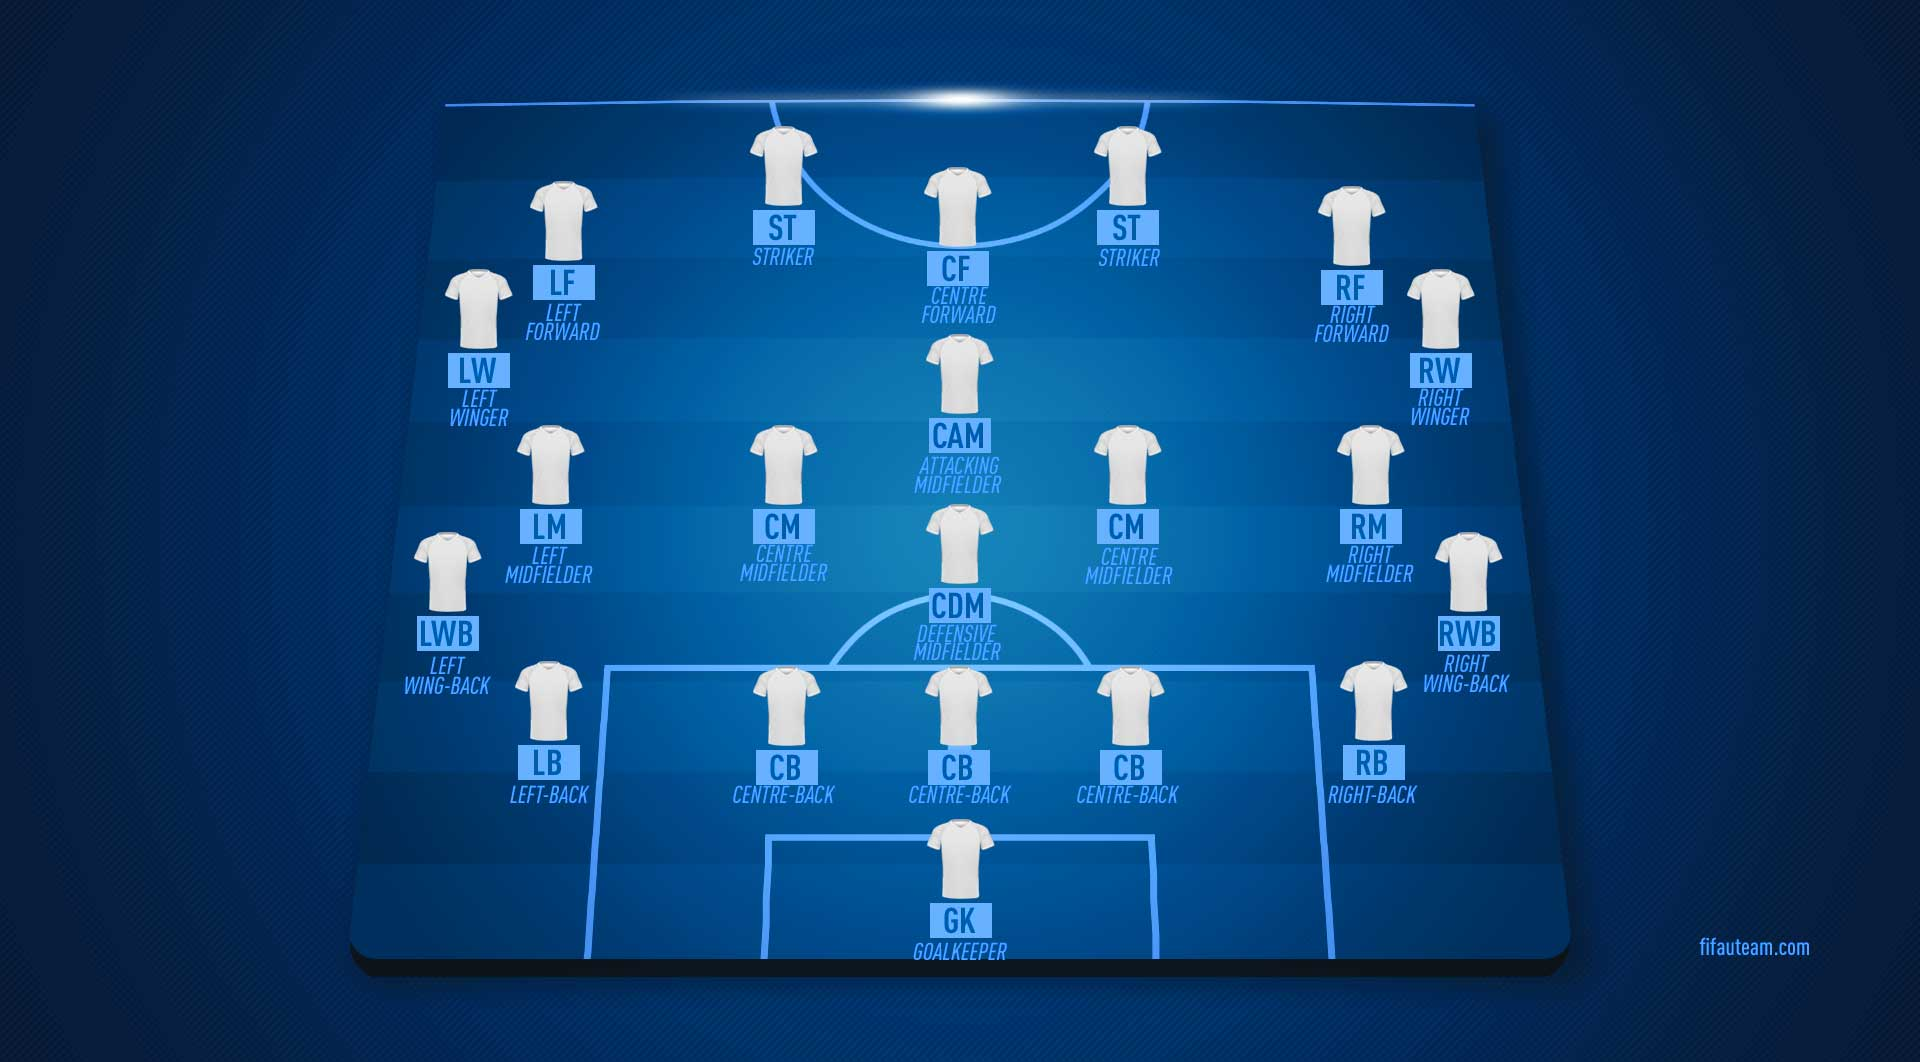

In [ ]:
#se agrega una nueva columna donde se encasilla a los jugadores en posiciones generales, siendo estas Arquero, Defensor, Volante y Delantero

map_position={'CAM':'Volante','CM':'Volante', 'LB':'Defensor',  'ST':'Delantero', 'CDM':'Volante', 'CB':'Defensor', 'RB':'Defensor', 'LM':'Volante', 
              'RW':'Volante', 'LW':'Volante', 'CF':'Delantero', 'LWB':'Defensor', 'RM':'Volante','RWB':'Defensor', 'GK':'Arquero'}

df_nuevo['General Position'] = df_nuevo['Best Position'].map(map_position)

df_nuevo.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,General Position
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,€250K,2341,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,Volante
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,€140K,2314,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,Volante
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,€135K,2307,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,Delantero
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,€350K,2304,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,Volante
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,€45K,2292,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,Defensor


In [ ]:
df_nuevo.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness',
       'General Position'],
      dtype='object')

Eliminaremos algunas columnas que no nos parecen relevantes

In [ ]:
df_filtrada = df_nuevo[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage',
       'International Reputation',
       'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 
       'General Position']]

df_filtrada.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Height,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,General Position
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,€250K,3.0,179cm,...,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,Volante
1,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,€140K,4.0,189cm,...,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,Volante
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,€135K,5.0,182cm,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,Delantero
3,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,€350K,4.0,181cm,...,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,Volante
4,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,€45K,2.0,172cm,...,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,Defensor


In [ ]:
# Buscamos valores nulos en el dataset
df_filtrada.isna().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Value                           0
Wage                            0
International Reputation        0
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy                      0
LongPassing                     0
BallControl                     0
Acceleration                    0
SprintSpeed                     0
Agility                         0
Reactions                       0
Balance                         0
ShotPower                       0
Jumping                         0
Stamina                         0
Strength      

In [ ]:
# observamos que la cantidad de nulos en la columna de marking es muy relevante, por lo que la eliminaremos del dataset
df_filtrada = df_filtrada[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage',
       'International Reputation',
       'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 
       'General Position']]

In [ ]:
df_filtrada.isna().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
International Reputation    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positionin

In [ ]:
df_filtrada[df_filtrada['International Reputation'].isna()].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Height,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,General Position


In [ ]:
# observamos que los valores nulos restantes pertencen a un solo jugador, por lo que lo eliminamos del dataset

df_filtrada.dropna(subset=['International Reputation'], inplace=True)
df_filtrada.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
International Reputation    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positionin

In [ ]:
df_filtrada.shape

(16366, 46)

## 6. Análisis de componentes principales.

A continuacion se analizan algunas de las variables que se consideran claves para la realizacion del objetivo propuesto.

Analisis de la valorizacion total de los jugadores. Se observa un analisis general para verificar los datos, un histograma para ver la distribucion de las valoraciones y un grafico de caja para verificar que no haya outliers

In [ ]:
# se selecciona la variable Overall, que asigna un valor total al jugador
# se realiza un describe para ver el comportamiento de la variable
df_filtrada.Overall.describe()

count    16366.000000
mean        67.595197
std          6.438869
min         44.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

Text(0.5, 1.0, 'Distribucion de los datos de Overall')

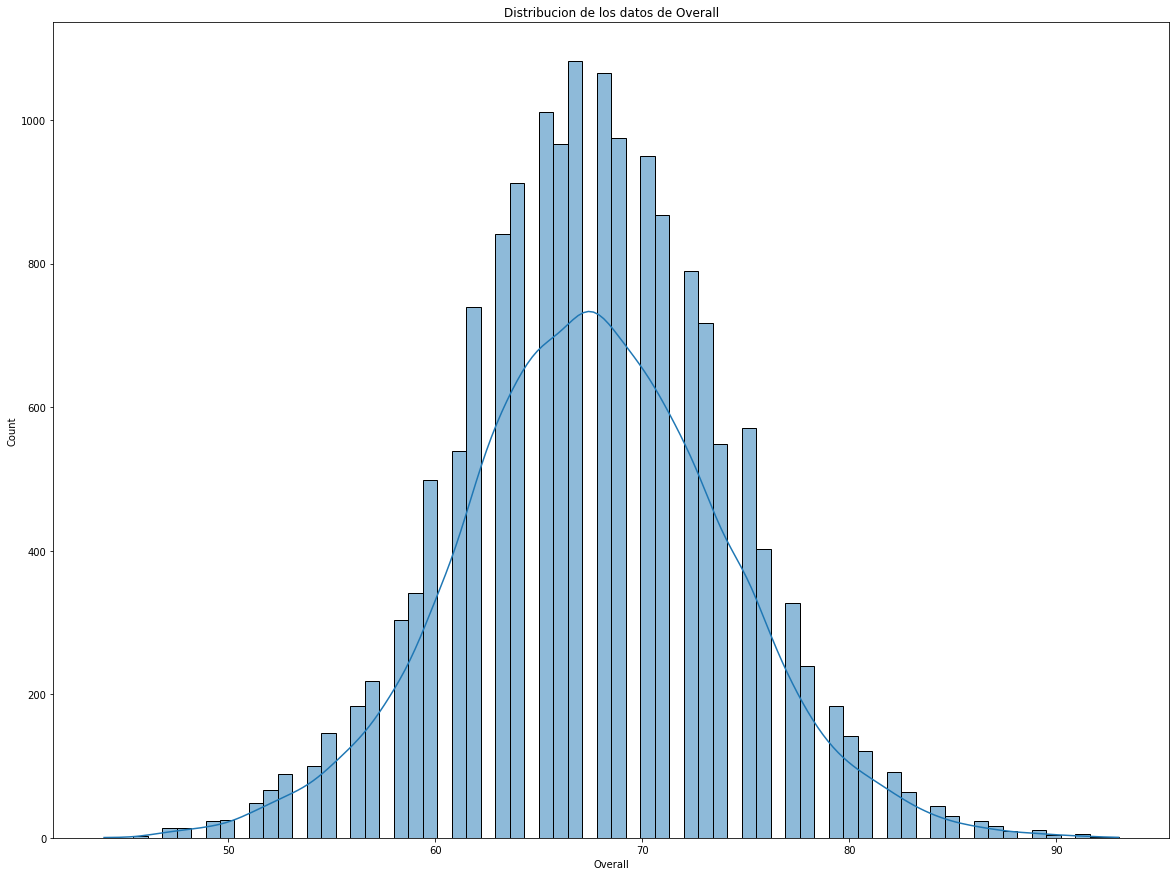

In [ ]:
sns.histplot(data = df_filtrada, x='Overall', kde=True)
plt.title('Distribucion de los datos de Overall')

Text(0.5, 1.0, 'Boxplot de los datos de Overall')

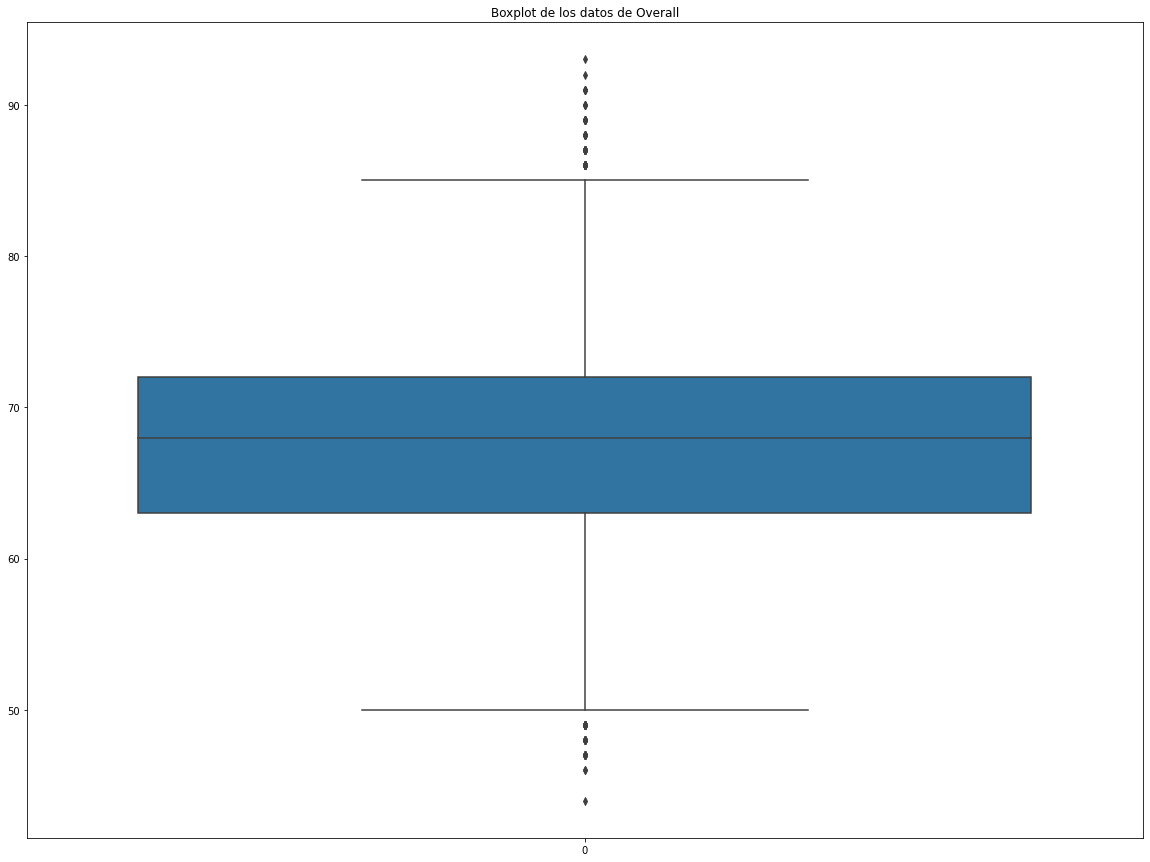

In [ ]:
# realizamos un boxplot para observar si hay datos outliers 
sns.boxplot(data=df_filtrada.Overall, orient="v")
plt.title('Boxplot de los datos de Overall')

Se realiza un grafico de barras para verificar la cantidad de jugadores por posicion con los que se cuenta para el analisis

Text(0.5, 1.0, 'Cantidad de jugadores por posicion')

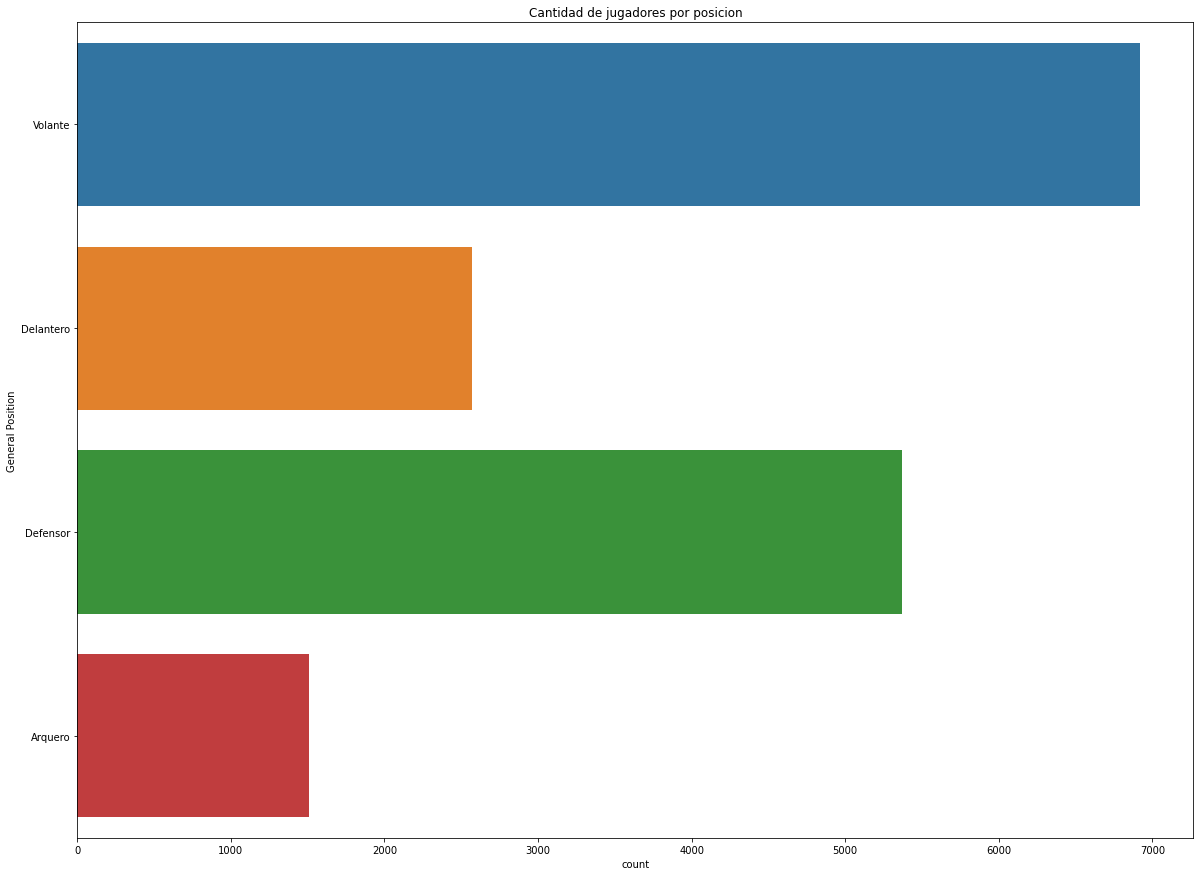

In [ ]:
# analizamos la variable categorica de posicion general
sns.countplot(data=df_filtrada,y='General Position')
plt.show
plt.title('Cantidad de jugadores por posicion')

Observamos que no hay arqueros en el dataset

Analisis de las edades de los jugadores. Se observa un analisis general para verificar los datos, un histograma para ver la distribucion de las edades y un grafico de caja para verificar que no haya outliers

In [ ]:
# Describe de la columna 'AGE'

df_filtrada['Age'].describe()

count    16366.000000
mean        25.633753
std          4.992195
min         16.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         45.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribucion de los datos de edad')

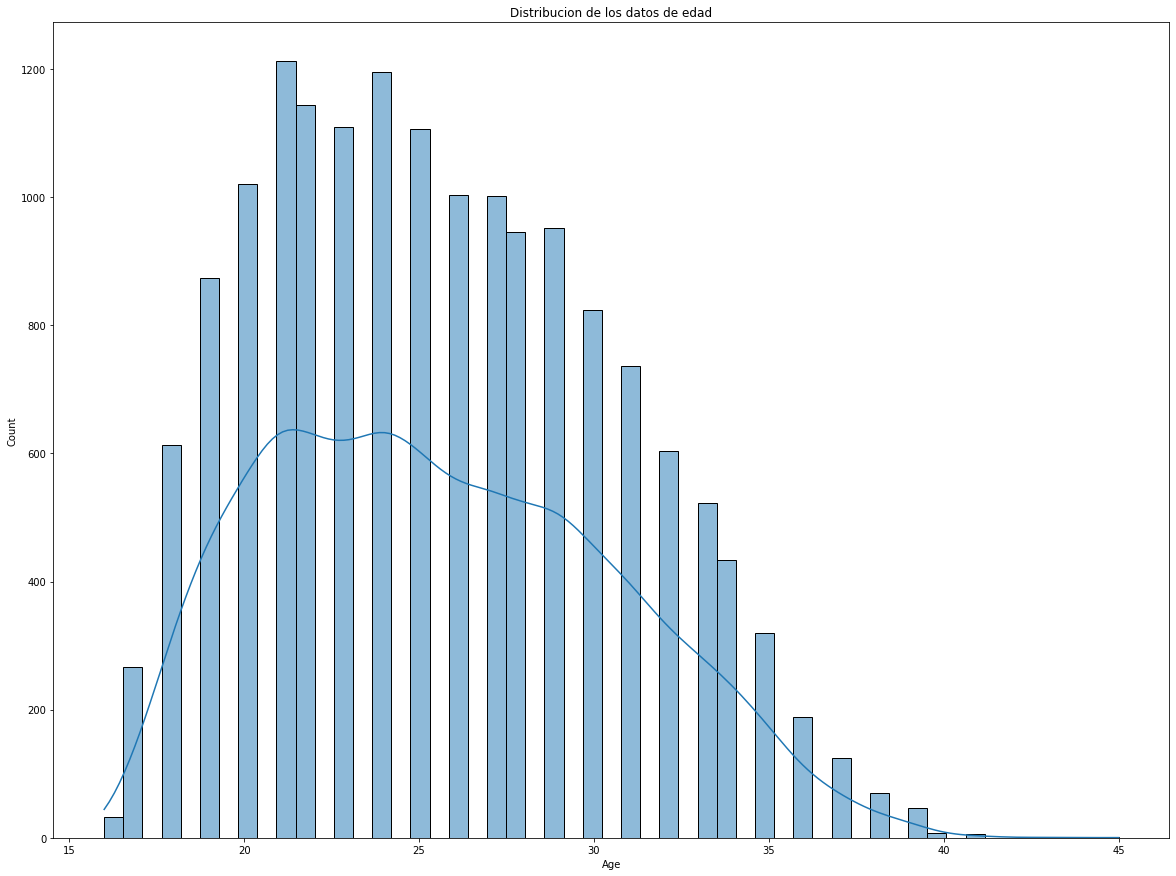

In [ ]:
# histograma de la variable AGE

sns.histplot(data = df_filtrada, x='Age', kde=True)
plt.title('Distribucion de los datos de edad')

Text(0.5, 1.0, 'Boxplot de los datos de edad')

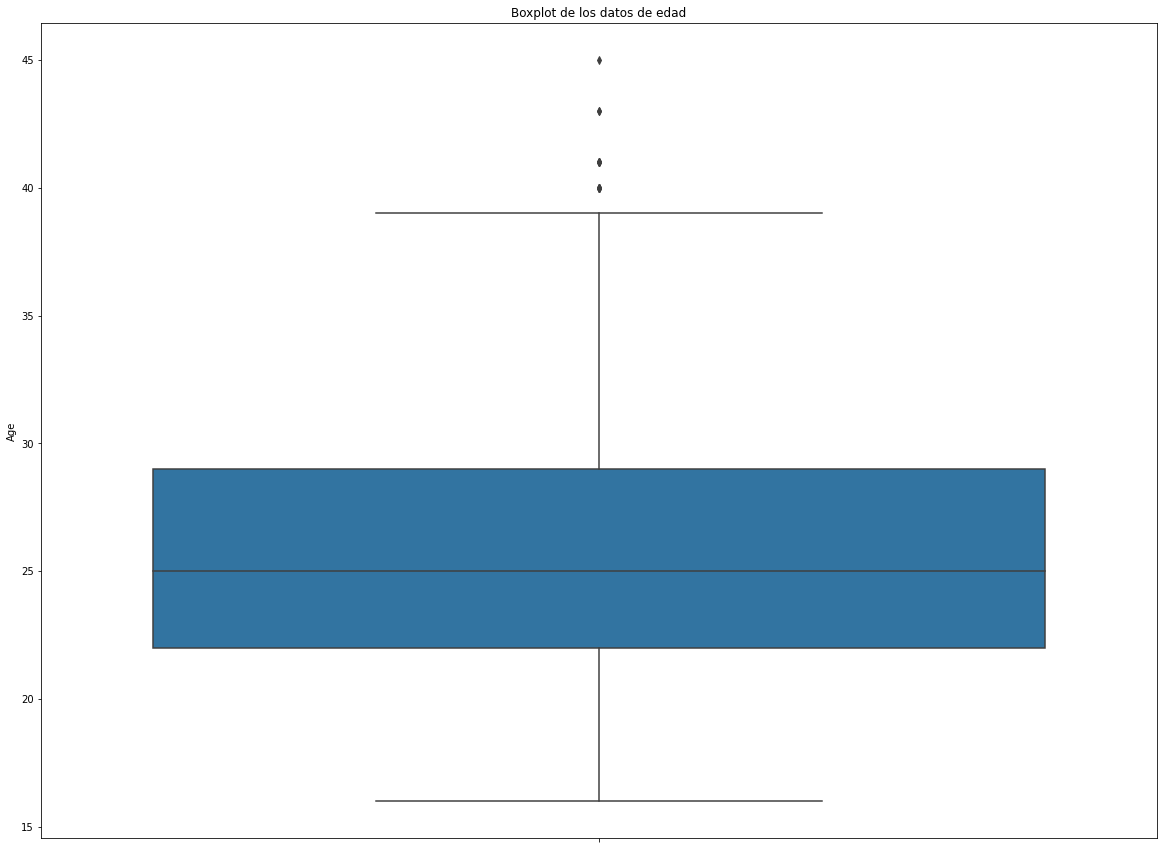

In [ ]:
# box plot de la variable AGE

sns.boxplot(y = df_filtrada['Age'])
plt.title('Boxplot de los datos de edad')

Analisis de la variable del valor de los jugadores

In [ ]:
df_filtrada.Value.describe()

count    16366.000000
mean         3.417592
std          8.193673
min          0.001000
25%          0.650000
50%          1.300000
75%          2.600000
max        194.000000
Name: Value, dtype: float64

## 7. Contar la historia de sus datos

Entre todos los atributos con los que contamos, pasaremos a verificar si se observa relacion entre la valoracion total del jugador y su correspondiente valor de mercado

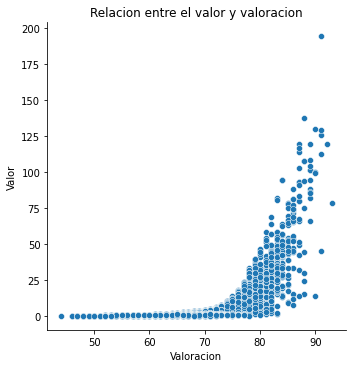

In [ ]:
g = sns.FacetGrid(df_filtrada, height = 5, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.show()

Ahora, si ademas lo visualizamos por posicion:

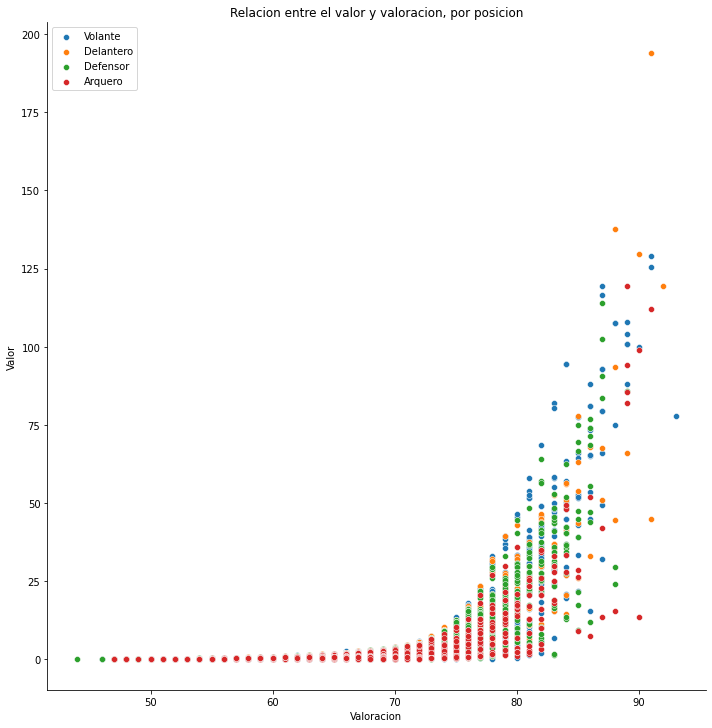

In [ ]:
g = sns.FacetGrid(df_filtrada, hue='General Position', height = 10, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion, por posicion')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.legend()
plt.show()

Despues nos preguntamos si el valor de mercado estara relacionado con el potencial con el cual se lo valora al jugador

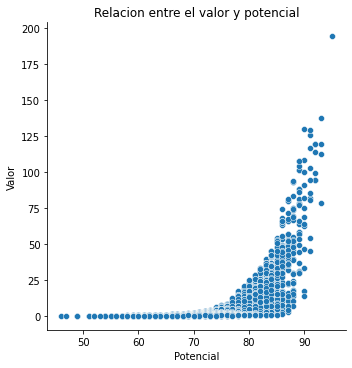

In [ ]:
g = sns.FacetGrid(df_filtrada, height = 5, aspect=1)
g.map(sns.scatterplot, 'Potential', 'Value')
plt.title('Relacion entre el valor y potencial')
plt.xlabel('Potencial')
plt.ylabel('Valor')
plt.show()

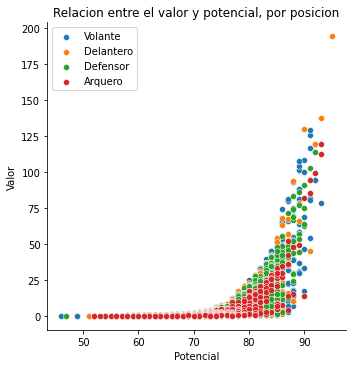

In [ ]:
g = sns.FacetGrid(df_filtrada, hue='General Position', height = 5, aspect=1)
g.map(sns.scatterplot, 'Potential', 'Value')
plt.title('Relacion entre el valor y potencial, por posicion')
plt.xlabel('Potencial')
plt.ylabel('Valor')
plt.legend()
plt.show()

La relacion observable es muy parecida a la de la valoracion del jugador.

Otra variable a la hora de considerar el valor del jugador es su reputacion internacional. Al ser mas reconocido en el mundo, el jugador pasa a valer mas?

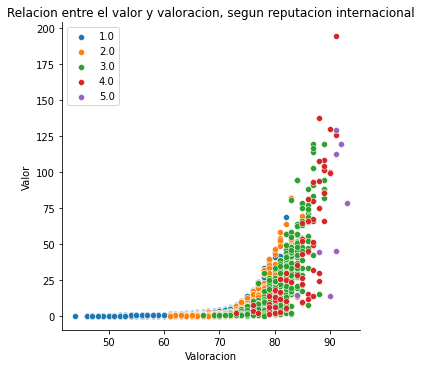

In [ ]:
g = sns.FacetGrid(df_filtrada, hue='International Reputation', height = 5, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion, segun reputacion internacional')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.legend()
plt.show()

## 8. Filtros aplicados a los datos. Distribución. Dataset final para analizar.

In [ ]:
# eliminamos los atributos especiales de arquero, ya que no hay arqueros en el dataset
df_filtrada = df_filtrada[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage',
       'International Reputation',
       'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'StandingTackle', 'SlidingTackle', 'Best Position',
       'Best Overall Rating', 
       'General Position']]

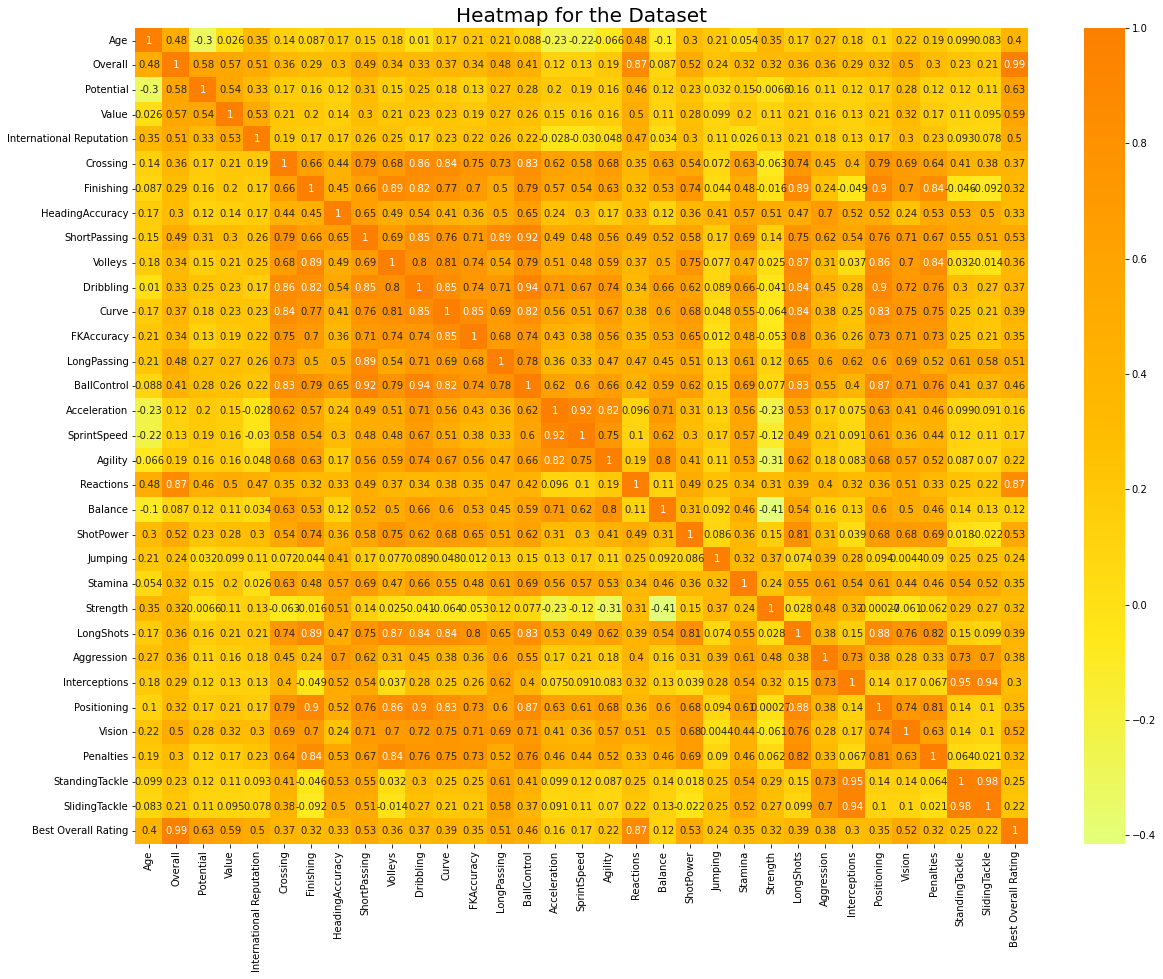

In [ ]:
# realizamos un mapa de calor para observar la relacion de los atributos entre si
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df_filtrada.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## 9. Elegir una variable de target.

Value es la variable a predecir. Se deberan eliminar las variables que no sean numericas, como el nombre, el club, la posicion, entre otras

In [ ]:
df_filtrada.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'International Reputation', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'StandingTackle',
       'SlidingTackle', 'Best Position', 'Best Overall Rating',
       'General Position'],
      dtype='object')

In [ ]:
#Separamos en X e y
X = df_filtrada.drop(['Value'], axis=1)
y = df_filtrada["Value"]
X.drop(["Name", 'Club', "Nationality", "Wage", "Height", "Weight",'Best Position', "General Position"], axis=1, inplace=True)

X.head()

,Age,Overall,Potential,International Reputation,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,StandingTackle,SlidingTackle,Best Overall Rating
0,26,88,89,3.0,87.0,83.0,64.0,91.0,87.0,83.0,...,70.0,89.0,78.0,66.0,87.0,90.0,91.0,73.0,65.0,88.0
1,26,87,88,4.0,75.0,82.0,86.0,86.0,69.0,84.0,...,88.0,86.0,81.0,86.0,85.0,84.0,60.0,85.0,77.0,87.0
2,34,88,88,5.0,80.0,93.0,84.0,83.0,90.0,83.0,...,85.0,88.0,87.0,41.0,91.0,84.0,83.0,45.0,38.0,88.0
3,30,91,91,4.0,94.0,82.0,55.0,94.0,82.0,88.0,...,74.0,91.0,76.0,66.0,88.0,94.0,83.0,65.0,53.0,91.0
4,29,84,84,2.0,87.0,66.0,58.0,82.0,68.0,87.0,...,80.0,81.0,84.0,79.0,81.0,82.0,76.0,84.0,82.0,84.0


In [ ]:
#Separamos en train y test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.20, random_state=11)

## 10. Algoritmos de regresión aplicados

### Arbol de Decision

In [ ]:
tree_reg_1 = DecisionTreeRegressor(max_depth=3)

In [ ]:
tree_reg_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_train_pred_tree_1 = tree_reg_1.predict(X_train)
y_test_pred_tree_1 = tree_reg_1.predict(X_test)

In [ ]:
rmse_train_tree_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_1))
rmse_test_tree_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_1))
r_tree_train_1 = metrics.r2_score(y_train, y_train_pred_tree_1)
r_tree_test_1 = metrics.r2_score(y_test, y_test_pred_tree_1)
print(f'Raíz del error cuadrático medio - Train: {round(rmse_train_tree_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_test_tree_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_tree_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_tree_test_1,3)}')

Raíz del error cuadrático medio - Train: 2.867
Raíz del error cuadrático medio - Test : 3.53
Ajuste del valor de R cuadrado  - Train: 0.872
Ajuste del valor de R cuadrado  - Test : 0.842


A medida que aumentamos la profundidad del arbol de decision, el algoritmo se aprende los datos, por lo que se produce un overfitting. Con una profundidad de 15, se obtiene un R2 = 1, por lo que se confirma el overfitting.

Con una profundidad menor, =3, se obtienen buenos resultados tanto en el conjunto de train y test. Estos resultados son parecidos, lo que indica que el modelo no sufre de varianza.

---

### Regresion Lineal

In [ ]:
lineal_reg_1 = LinearRegression()
lineal_reg_1.fit(X_train, y_train)

y_train_pred_lin_1 = lineal_reg_1.predict(X_train)
y_test_pred_lin_1 = lineal_reg_1.predict(X_test)

rmse_lin_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_lin_1))
rmse_lin_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_lin_1))
r_lin_train_1 = metrics.r2_score(y_train, y_train_pred_lin_1)
r_lin_test_1 = metrics.r2_score(y_test, y_test_pred_lin_1)

print(f'Raíz del error cuadrático medio - Train: {round(rmse_lin_train_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_lin_test_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_lin_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_lin_test_1,3)}')

Raíz del error cuadrático medio - Train: 5.549
Raíz del error cuadrático medio - Test : 6.34
Ajuste del valor de R cuadrado  - Train: 0.521
Ajuste del valor de R cuadrado  - Test : 0.489


In [ ]:
print(lineal_reg_1.coef_, lineal_reg_1.intercept_)

[-6.29152529e-01  5.64137690e-01 -4.42624879e-02  6.62486764e+00
 -4.03234995e-03  5.16671620e-02 -1.14789982e-02 -1.72764008e-02
 -1.03196127e-02 -3.15053196e-02  1.00355080e-02  9.85399521e-03
  4.92384805e-03 -4.11690360e-02 -1.31253066e-02  2.16556239e-02
  1.91769372e-03  6.74269954e-02  1.55541408e-02 -2.79240051e-02
 -9.82011412e-03  3.97026250e-02  1.75122169e-02 -1.35317520e-02
 -1.58519129e-03  8.23523227e-03  7.15403999e-03  1.94859008e-02
 -1.52876472e-02  6.53388011e-03 -1.22317853e-02  1.11721811e-01] -35.18273615541934


### KNN

In [ ]:
knn_reg_1 = KNeighborsRegressor(n_neighbors = 4)

knn_reg_1.fit(X_train, y_train) 

y_train_pred_knn_1 = knn_reg_1.predict(X_train)
y_test_pred_knn_1 = knn_reg_1.predict(X_test)

rmse_train_knn_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_knn_1))
rmse_test_knn_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_knn_1))
r_knn_train_1 = metrics.r2_score(y_train, y_train_pred_knn_1)
r_knn_test_1 = metrics.r2_score(y_test, y_test_pred_knn_1)

In [ ]:
print(f'Raíz del error cuadrático medio - Train: {round(rmse_train_knn_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_test_knn_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_knn_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_knn_test_1,3)}')

Raíz del error cuadrático medio - Train: 3.029
Raíz del error cuadrático medio - Test : 5.034
Ajuste del valor de R cuadrado  - Train: 0.857
Ajuste del valor de R cuadrado  - Test : 0.678


### Random Forest

In [ ]:
#Creamos un random forest
bosque = RandomForestRegressor(n_estimators=50,max_depth=3)
bosque.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [ ]:
#Prediccion en Test
y_train_pred = bosque.predict(X_train)
y_test_pred = bosque.predict(X_test)

rmse_train_rfr_1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_rfr_1 = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_rfr_train_1 = metrics.r2_score(y_train, y_train_pred)
r_rfr_test_1 = metrics.r2_score(y_test, y_test_pred)

print(f'Raíz del error cuadrático medio - Train: {round(rmse_train_rfr_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_test_rfr_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_rfr_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_rfr_test_1,3)}')

Raíz del error cuadrático medio - Train: 2.277
Raíz del error cuadrático medio - Test : 3.172
Ajuste del valor de R cuadrado  - Train: 0.919
Ajuste del valor de R cuadrado  - Test : 0.872


Con el modelo de Random Forest se han mejorado los resultados del modelo de arbol de decision. Mantuvimos la profundidad del arbol de decision realizado previamente, y variamos la cantidad de arboles a realizar, sin tener demasiadas diferencias en el resultado.

Con este modelo lo que se prevee es que el modelo se aprenda los datos, y no se genere un overfitting